# Handling Missing Data
## Categorical Data
### Most Frequent Imputation

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
# this is a dataset of houses
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
# for the sake of this notebook we are using only 4 columns
df = df[['GarageQual', 'FireplaceQu', 'SalePrice']]

In [70]:
# looka the missing values
df.isnull().mean()*100
# missing values percentage

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

Note that 'GarageQual' has less missing values and almost half of 'FirePlaceQu' is missing!!

### Using Pandas

<Axes: >

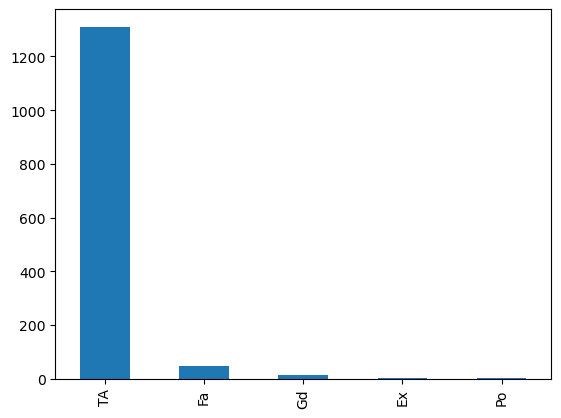

In [71]:
# plotting a bar graph to see the distribution
df['GarageQual'].value_counts().plot.bar()
# we note that there is a high occurence of TA

In [72]:
# mode of the data is...
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

Text(0.5, 1.0, 'GarageQual')

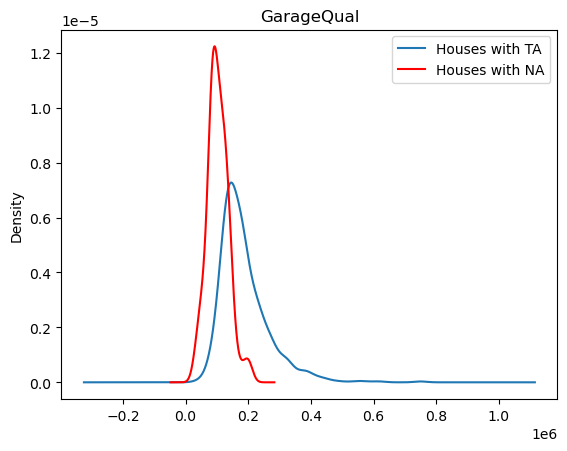

In [73]:
# printing distribution of Sale Price with TA and with missing values
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [74]:
temp = df[df['GarageQual']=='TA']['SalePrice']
# storing this future reference

Filling in the missing values here....

In [75]:
# fill the missing values
df['GarageQual'].fillna('TA', inplace=True)

<Axes: >

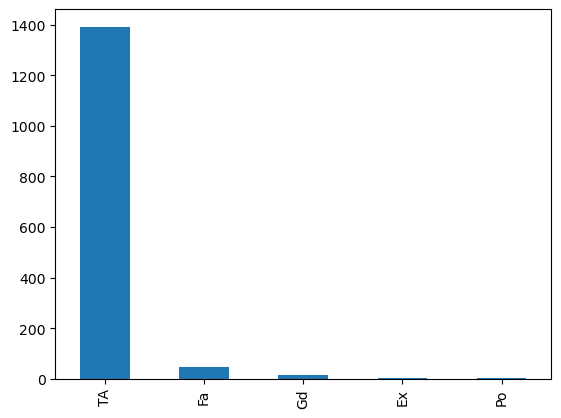

In [76]:
df['GarageQual'].value_counts().plot(kind='bar')
# note the number of values for TA has increased

Text(0.5, 1.0, 'GarageQual')

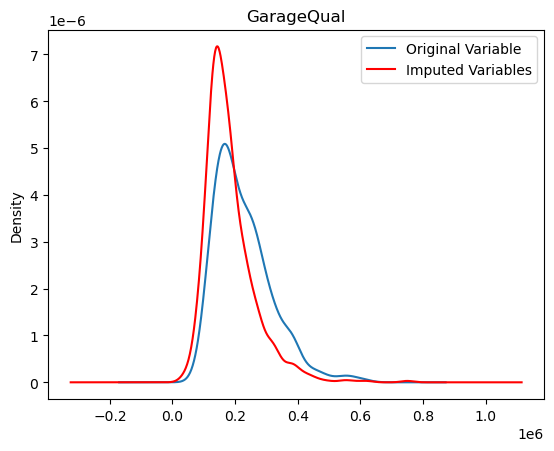

In [90]:
# plotting the new distribution and the original distribution
fig = plt.figure()
ax = fig.add_subplot(111)

# original distribution
temp.plot(kind='kde', ax=ax)

#distribution after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variables']
ax.legend(lines, labels, loc='best')

# add title 
plt.title('GarageQual')
# Note that we have little change in the distribution as the number of missing values is less

<Axes: >

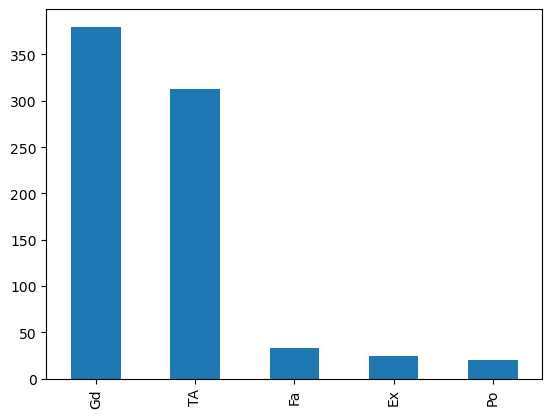

In [78]:
df['FireplaceQu'].value_counts().plot(kind='bar')
# note that we have two categories with high count instead of just one

In [79]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

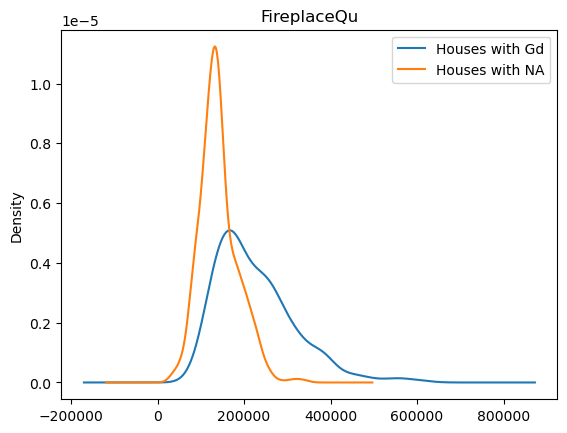

In [80]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']== 'Gd']['SalePrice'].plot(kind='kde', ax=ax)
# plotting the null values
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax)

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [81]:
# saving before imputing distribution
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [82]:
# fill the missing values with 'Gd'
df['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: >

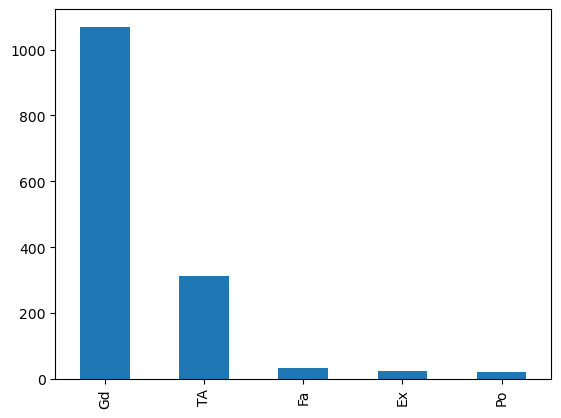

In [83]:
df['FireplaceQu'].value_counts().plot(kind='bar')
# note that the count of 'Gd' has increased drastically

Text(0.5, 1.0, 'FirepalceQu')

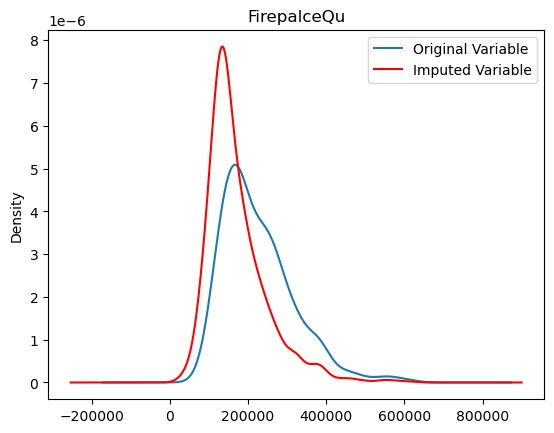

In [92]:
# plotting temp and the new distribution
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde', ax=ax)

df[df['FireplaceQu'] =='Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variable']
ax.legend(lines, labels, loc='best')

plt.title('FirepalceQu')
# note that the distribution doesnt match the original

### Using Sklearn

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['SalePrice']), df['SalePrice'], test_size=0.2, random_state=2)

In [86]:
from sklearn.impute import SimpleImputer

In [87]:
imputer = SimpleImputer(strategy='most_frequent')

In [88]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_train)

c:\Dat\Miniconda\envs\data\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [89]:
imputer.statistics_

array(['TA', 'Gd'], dtype=object)